In [292]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [293]:
# Interested 'Food Group' and 'Food Category' to extract from the datasheet

# Food Group
fg = ['Cheese', 'Carcase meat', 'Non-carcase meat and meat products', 
      'Fish', 'Eggs', 'Fats', 'Sugar and preserves', 'Bread', 'Flour', 'Cakes, buns and pastries', 
      'Biscuits and crispbreads', 'Other cereals and cereal products', 'Beverages', 'Other food and drink', 
      'Soft drinks', 'Confectionery', 'Alcoholic drinks']

# Food Category
fc = ['Milk and milk products excluding cheese', 'Fresh and processed fruit and vegetables, including potatoes', 
      'Fresh and processed vegetables, including potatoes', 'Fresh and processed potatoes', 
      'Fresh and processed fruit and vegetables, excluding potatoes', 
      'Fresh and processed vegetables, excluding potatoes', 'Fresh and processed fruit']

In [294]:
# list of dataframes, 1 for each sheet in the excel workbook
df_dec = []

for i in range(1, 11):
    sheetName = 'Decile_' + str(i)
    
    df = pd.read_excel("Decile_QTY_Purchased_UK.xlsx", sheet_name= sheetName, header = 7)
    
    df1 = df[df['Food Group'].isin(fg) | df['Food Category'].isin(fc)]
    df1 = df1.drop(['Major Food Code', 'Minor Food Code'], axis = 1)
    df1['Food Group'] = df1['Food Group'].combine_first(df1['Food Category'])
    df1 = df1.drop(['Food Category','RSE indicator(a)', '% change since 201819', 'sig(b)', 'trend since 201819(c)'], axis = 1).reset_index(drop=True)
    
    # Standardizing units across Food Groups to grams (g)
    
    # Milk - ml * 1.04 = g
    
    df_t = df1.loc[[0]]
    df_t[df_t.select_dtypes(include = ['number']).columns] *= 1.04
    df_t['Units'].replace('ml', 'g', inplace = True)
    
    # Eggs - No. * 63 = g
    df_t2 = df1.loc[[5]]
    df_t2[df_t2.select_dtypes(include = ['number']).columns] *= 63
    df_t2['Units'].replace('no.', 'g', inplace = True)
    
    # Amending 'Milk' and 'Eggs' to the updated(g) values
    df1 = df1.drop([0])
    df1 = df1.drop([5])
    df1 = df1.append(df_t)
    df1 = df1.append(df_t2).reset_index(drop = True)
    
    # Dropping Alcoholic Beverage & Soft Drinks
    df1 = df1.drop([6, 7, 9, 17, 18, 19, 21]).reset_index(drop = True)
    
    # Renaming into major groups
    df1['Food Group'].replace('Carcase meat', 'Meat & Fish', inplace=True)
    df1['Food Group'].replace('Non-carcase meat and meat products', 'Meat & Fish', inplace=True)
    df1['Food Group'].replace('Fish', 'Meat & Fish', inplace=True)
    df1['Food Group'].replace('Sugar and preserves', 'Added Sugars', inplace=True)
    df1['Food Group'].replace('Confectionery', 'Added Sugars', inplace=True)
    df1['Food Group'].replace('Cakes, buns and pastries', 'Carbs', inplace=True)
    df1['Food Group'].replace('Bread', 'Carbs', inplace=True)
    df1['Food Group'].replace('Flour', 'Carbs', inplace=True)
    df1['Food Group'].replace('Biscuits and crispbreads', 'Carbs', inplace=True)
    df1['Food Group'].replace('Other cereals and cereal products', 'Carbs', inplace=True)
    df1['Food Group'].replace('Fresh and processed potatoes', 'Carbs', inplace=True)
    df1['Food Group'].replace('Fresh and processed vegetables, excluding potatoes', 'Vegetables', inplace=True)
    df1['Food Group'].replace('Cheese', 'Eggs & Dairy', inplace=True)
    df1['Food Group'].replace('Eggs', 'Eggs & Dairy', inplace=True)
    df1['Food Group'].replace('Milk and milk products excluding cheese', 'Eggs & Dairy', inplace=True)
    df1['Food Group'].replace('Fresh and processed fruit', 'Fruits', inplace=True)
    
    df1 = df1.groupby('Food Group', as_index = False).sum()
    
    df_dec.append(df1)

C:\Users\Shaf\AppData\Local\Temp\ipykernel_19056\2615732689.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(df_t)
C:\Users\Shaf\AppData\Local\Temp\ipykernel_19056\2615732689.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(df_t2).reset_index(drop = True)
C:\Users\Shaf\AppData\Local\Temp\ipykernel_19056\2615732689.py:54: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1 = df1.groupby('Food Group', as_index = False).sum()
C:\Users\Shaf\AppData\Local\Temp\ipykernel_19056\2615732689.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future

In [295]:
yrs = [201718,201819,201920,202021,202122]
# new_labels = ['2015/16','2016/17','2017/18','2018/19','2019/20','2020/21']

dec_qtyList = []

for i in range(10):
    df_ext = df_dec[i][['Food Group'] + yrs]
    df_ext = df_ext.groupby('Food Group').sum().reset_index()
    
    df_melt = df_ext.melt(id_vars = ['Food Group'], var_name = 'Year', value_name = 'Quantity in grams')
    
    # mean Quantity (g)
    df_melt = df_melt.groupby('Food Group').mean().reset_index()
    
    dec_qtyList.append(df_melt)

low_class = dec_qtyList[0].copy()
mid_class = dec_qtyList[0].copy()
high_class = dec_qtyList[0].copy()

# Low Class (Averaging Decile 1-3)
qty_low = 0
for i in range(0, 3):
    qty_low += dec_qtyList[i]['Quantity in grams']
qty_low = qty_low/3

# Mid Class (Averaging Decile 4-7)
qty_mid = 0
for i in range(3, 7):
    qty_mid += dec_qtyList[i]['Quantity in grams']
qty_mid = qty_mid/4

# High Class (Averaging Decile 8-10)
qty_high = 0
for i in range(7, 10):
    qty_high += dec_qtyList[i]['Quantity in grams']
qty_high = qty_high/3

low_class['Quantity in grams'] = qty_low
mid_class['Quantity in grams'] = qty_mid
high_class['Quantity in grams'] = qty_high

C:\Users\Shaf\AppData\Local\Temp\ipykernel_19056\3898752961.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_melt = df_melt.groupby('Food Group').mean().reset_index()
C:\Users\Shaf\AppData\Local\Temp\ipykernel_19056\3898752961.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_melt = df_melt.groupby('Food Group').mean().reset_index()
C:\Users\Shaf\AppData\Local\Temp\ipykernel_19056\3898752961.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns wh

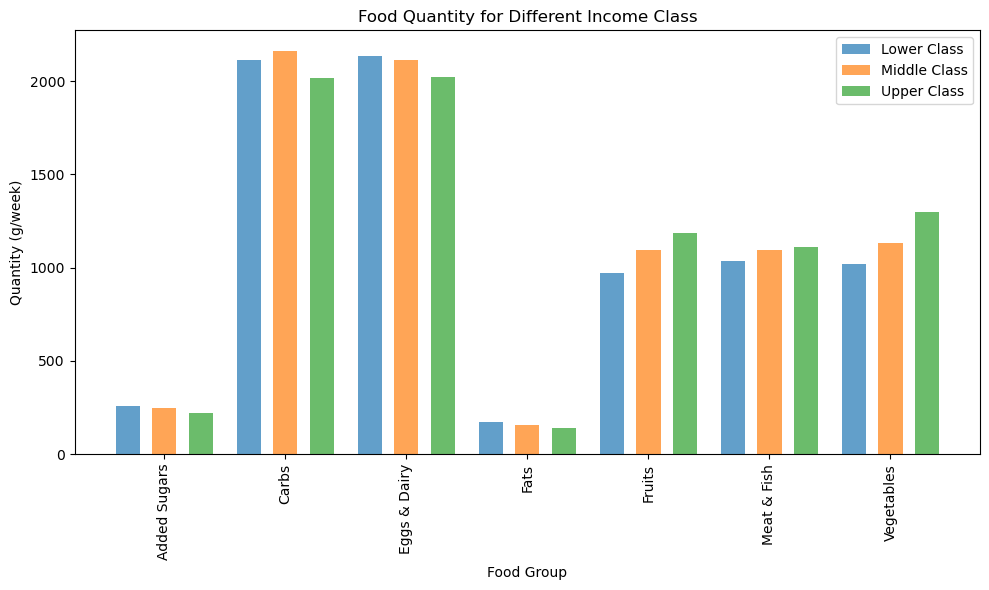

In [296]:
dfClass_merged = low_class.merge(mid_class, on = 'Food Group', suffixes=('_low', '_mid'))
dfClass_merged = dfClass_merged.merge(high_class, on = 'Food Group')

# Number of classes and food groups
num_classes = 3
num_groups = len(dfClass_merged)

# Set the width of each bar and the separation between groups
bar_width = 0.2
bar_spacing = 0.1

# Create positions for bars
x = np.arange(num_groups)

# Create a side-by-side bar chart
plt.figure(figsize=(10, 6))
plt.bar(x - bar_width - bar_spacing, dfClass_merged['Quantity in grams_low'], width=bar_width, label='Lower Class', alpha=0.7)
plt.bar(x, dfClass_merged['Quantity in grams_mid'], width=bar_width, label='Middle Class', alpha=0.7)
plt.bar(x + bar_width + bar_spacing, dfClass_merged['Quantity in grams'], width=bar_width, label='Upper Class', alpha=0.7)
plt.xlabel('Food Group')
plt.ylabel('Quantity (g/week)')
plt.title('Food Quantity for Different Income Class')
plt.legend(['Low Class', 'Middle Class', 'High Class'])
plt.xticks(x, dfClass_merged['Food Group'], rotation=45)  # Set x-axis labels

plt.legend()
plt.xticks(rotation = 90)
plt.tight_layout()

plt.show()


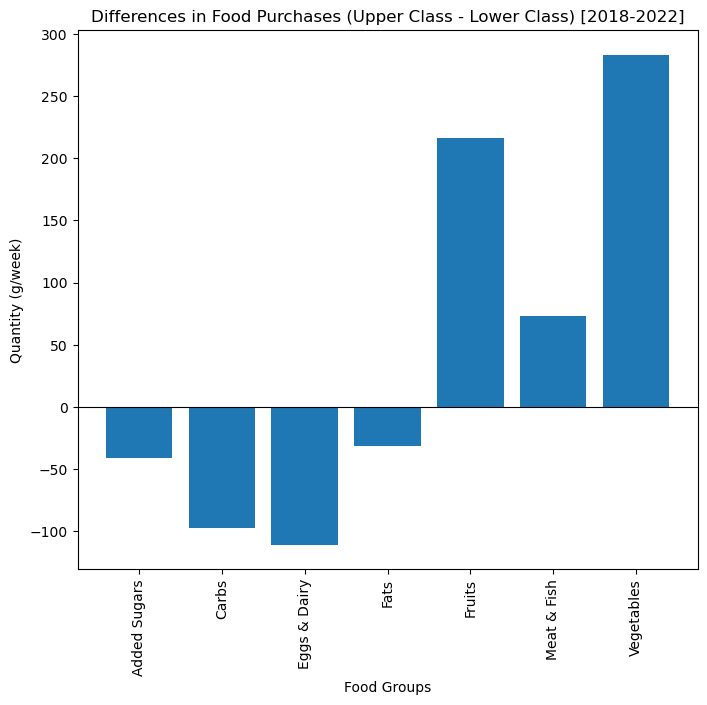

In [297]:
dfClass_merged['High - Low'] = dfClass_merged['Quantity in grams'] - dfClass_merged['Quantity in grams_low']

plt.figure(figsize=(8,7))
plt.bar(dfClass_merged['Food Group'], dfClass_merged['High - Low'])
plt.title('Differences in Food Purchases (Upper Class - Lower Class) [2018-2022]')
plt.ylabel('Quantity (g/week)')
plt.xlabel('Food Groups')
plt.xticks(rotation = 90)
plt.axhline(0, color = 'black', linewidth = 0.8)
plt.show()

Text(0.5, 1.0, 'Food Quantity by Income Class [2018-2022]')

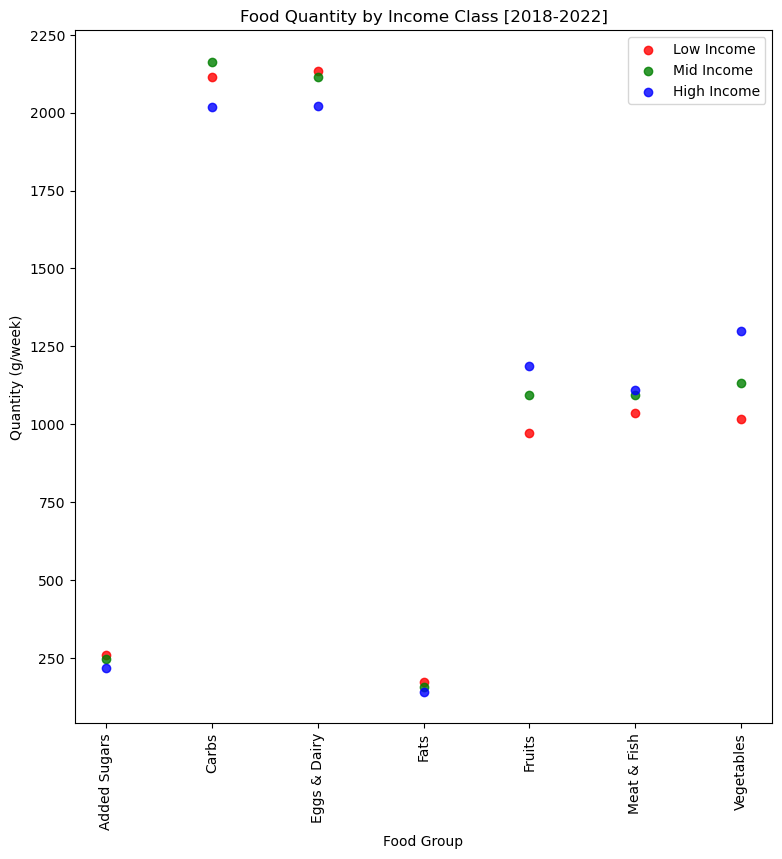

In [298]:
plt.figure(figsize= (9, 9))

x = dfClass_merged['Food Group']
y_low = dfClass_merged['Quantity in grams_low']
y_mid = dfClass_merged['Quantity in grams_mid']
y_high = dfClass_merged['Quantity in grams']

plt.scatter(x, y_low, label = 'Low Income', color = 'red', alpha = 0.8)
plt.scatter(x, y_mid, label = 'Mid Income', color = 'green', alpha = 0.8)
plt.scatter(x, y_high, label = 'High Income', color = 'blue', alpha = 0.8)

plt.xlabel('Food Group')
plt.ylabel('Quantity (g/week)')
plt.xticks(rotation = 90)
plt.legend()
plt.title('Food Quantity by Income Class [2018-2022]')

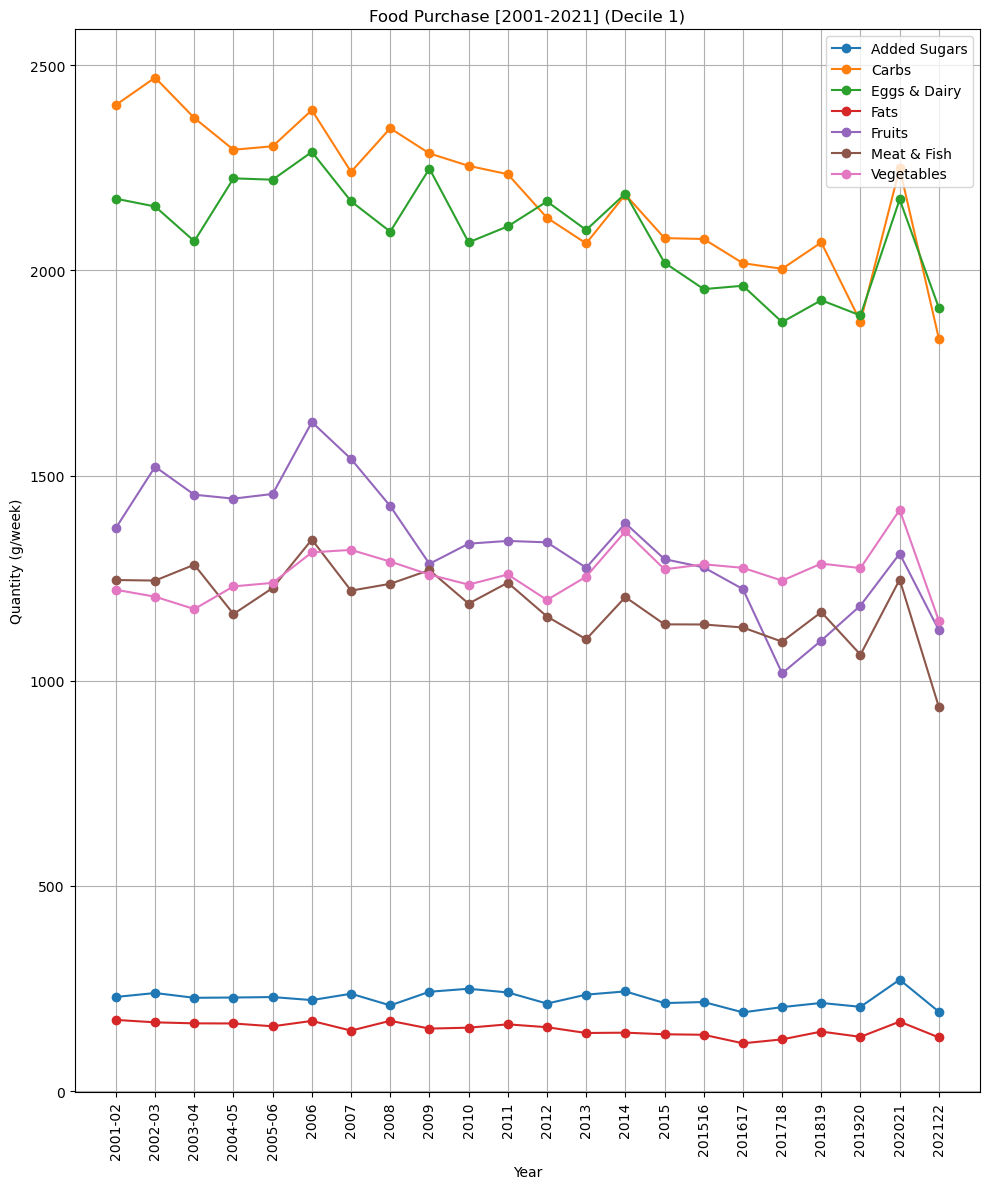

In [299]:
d1 = df_dec[8]

years = d1.columns[1:].astype(str)

plt.figure(figsize = (10,12))

ax = plt.subplot(111)

for ind, row in d1.iterrows():
    food_group = row['Food Group']
    
    quant = row[1:].astype(float)
    
    ax.plot(years, quant, marker = 'o', linestyle = '-', label = food_group)

plt.title('Food Purchase [2001-2021] (Decile 1)')
plt.xlabel('Year')
plt.ylabel('Quantity (g/week)')
plt.xticks(rotation = 90)
plt.grid(True)
#plt.ylim(1800,2650)
plt.legend()

plt.tight_layout()
plt.show()

In [300]:
df_lower = df_dec[0].copy()
df_middle = df_dec[0].copy()
df_upper = df_dec[0].copy()

df_lower.iloc[0:,1:] = (df_dec[0].iloc[0:, 1:] + df_dec[1].iloc[0:, 1:] + df_dec[2].iloc[0:, 1:])/3
df_middle.iloc[0:,1:] = (df_dec[3].iloc[0:, 1:] + df_dec[4].iloc[0:, 1:] + df_dec[5].iloc[0:, 1:] + df_dec[6].iloc[0:, 1:])/4
df_upper.iloc[0:,1:] = (df_dec[7].iloc[0:, 1:] + df_dec[8].iloc[0:, 1:] + df_dec[9].iloc[0:, 1:])/3

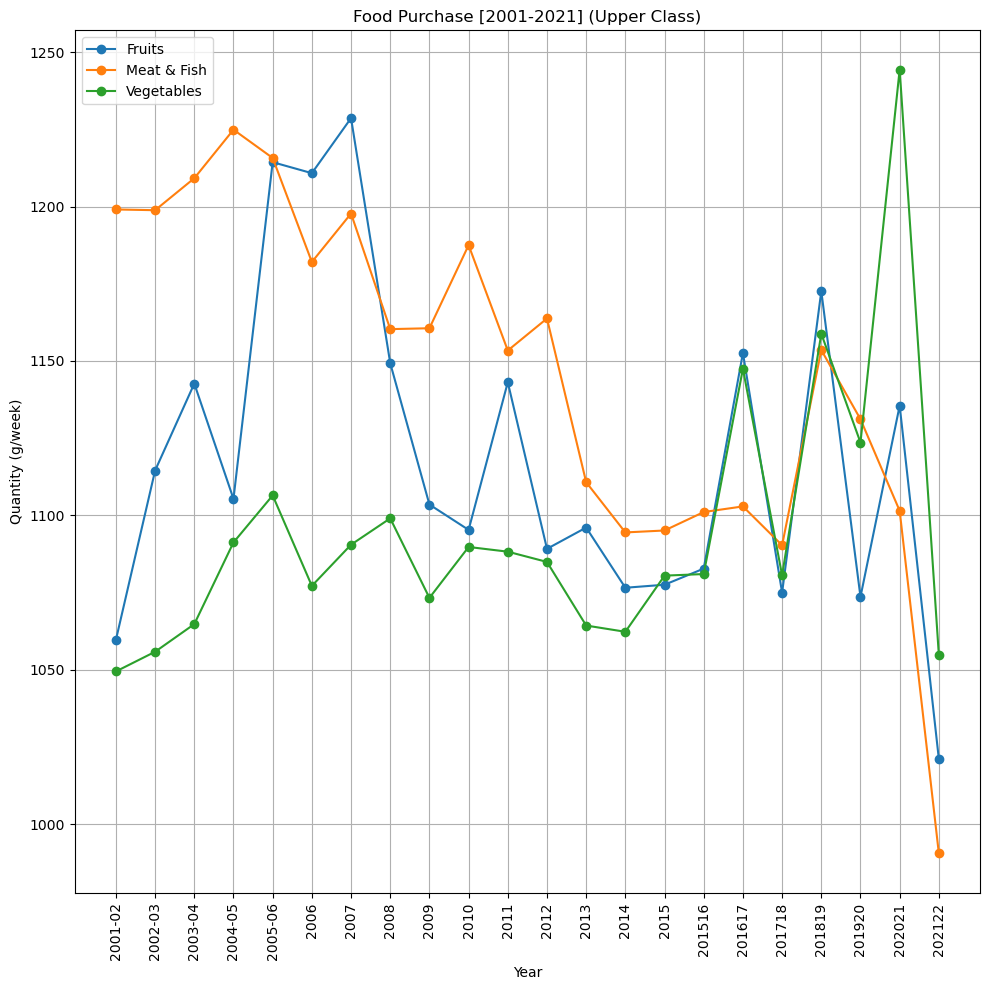

In [354]:
yrs = df_lower.columns[1:].astype(str)

plt.figure(figsize = (10, 10))

ax = plt.subplot(111)

for i, row in df_middle.iterrows():
    foodGroupLabel = row['Food Group']
    
    if(foodGroupLabel == 'Meat & Fish' or foodGroupLabel == 'Fruits' or foodGroupLabel == 'Vegetables'):
        quant = row[1:].astype(float)
        
        ax.plot(yrs, quant, marker = 'o', linestyle = '-', label = foodGroupLabel)

plt.title('Food Purchase [2001-2021] (Upper Class)')
plt.xlabel('Year')
plt.ylabel('Quantity (g/week)')
plt.xticks(rotation = 90)
plt.grid(True)
#plt.ylim(900, 1300)
plt.legend()

plt.tight_layout()

plt.show()

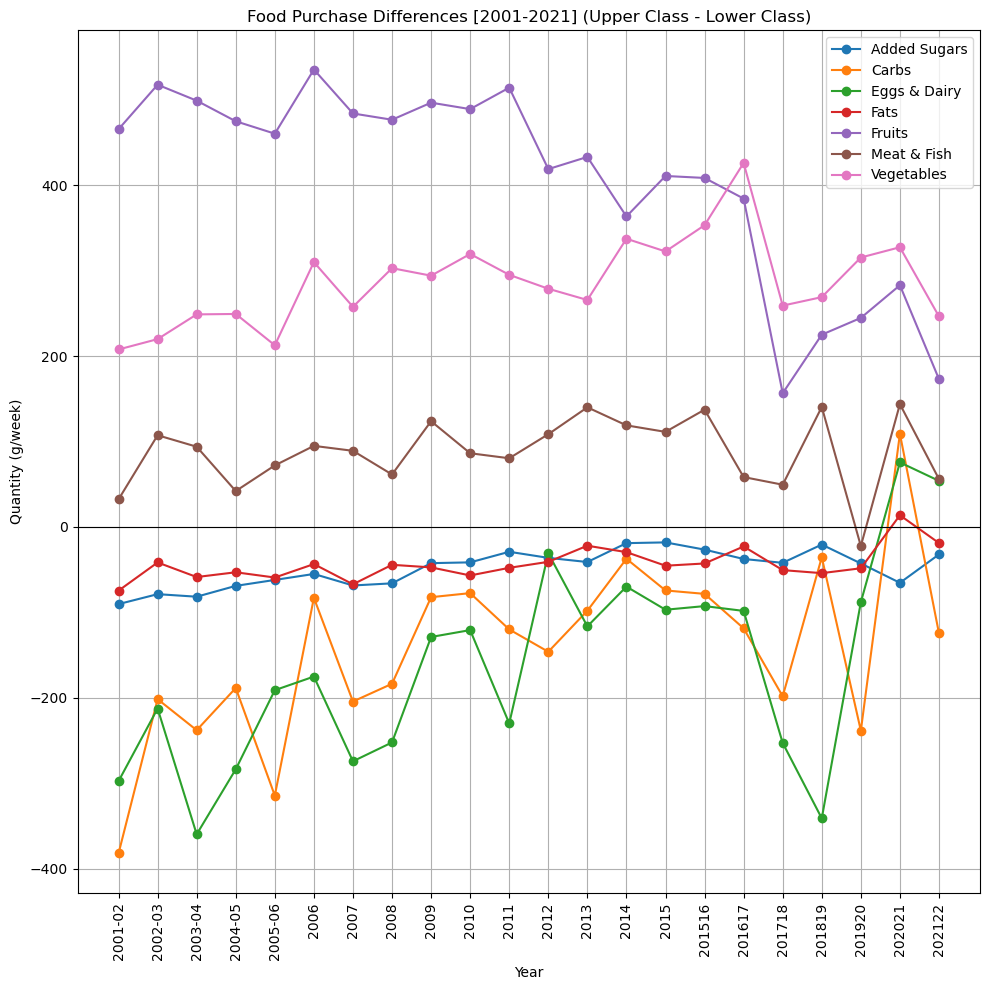

In [366]:
df_diff = df_lower.copy()

df_diff.iloc[0:,1:] = df_upper.iloc[0:, 1:] - df_lower.iloc[0:, 1:]

yrs = df_diff.columns[1:].astype(str)

plt.figure(figsize = (10, 10))
ax = plt.subplot(111)

for i, row in df_diff.iterrows():
    food_group = row['Food Group']
    
    quant = row[1: ].astype(float)
    
    ax.plot(yrs, quant, marker = 'o', linestyle = '-', label = food_group)
    
plt.title('Food Purchase Differences [2001-2021] (Upper Class - Lower Class)')
plt.xlabel('Year')
plt.ylabel('Quantity (g/week)')
plt.xticks(rotation = 90)
plt.grid(True)
plt.axhline(0, color = 'black', linewidth = 0.8)
plt.legend()

plt.tight_layout()

plt.show()